# Dan Crouthamel – SMU NLP Course — Homework 1

## Assignment Objectives

1. Install Python (if you don’t have it already), and install NLTK.

2. Follow the instructions in chapter 1 of Bird-Klein for implementing a “lexical diversity” scoring routine.

3. Go to http://www.gutenberg.org/wiki/Children%27s_Instructional_Books_(Bookshelf), and obtain three texts (of different grade levels) from the “Graded Readers” section. Report the lexical diversity score of each. Explain whether the result was surprising.

4. Also compare the vocabulary size of the same three texts. Explain whether the result was surprising.

5. Write a paragraph arguing whether vocabulary size and lexical diversity in combination could be a better measure of text difficulty (or reading level) than either measure is by itself.

## Solution

The approach I'll take here is to answer all the questions in one step, by creating a plot of **Lexical Diversity** vs **Number of Unique Words** along with **Total Word Count** vs **Number of Unique Words**. This will be done for 6 children reader books by McGuffey, grades 1st through 6th.

Let's define a few terms:

Vocabulary Size:   Number of Unique Words

Lexical Diversity:   Number of Words / Vocab Size

**Important - I'm using the definition of Lexical Diversity as defined in the printed book I purchased. That is, the number of words in the numerator and vocab size in the denominator.** This can be found on page 9, or see Counting Vocabulary section on the following site -> http://www.nltk.org/book_1ed/ch01.html

In the most recent version of the book, they switched the definition to be vocab size / number of words. This would be a number between 0 and 1, as opposed to a number greater than or equal to 1. Which definition you use depends on what you want to put more weight on. Total number of words, or vocabulary size? Suppose you have 3 words, and they are all the same. The lexical diversity then is 3. The inverse is .333. Now suppose you have 10 words and 5 unique words. The lexical diversity would be 2 (from above definition again), and the inverse is .5. The second example intuitively seeems more diverse.

### Library Imports

In [1]:
import nltk
import urllib
import matplotlib.pyplot as plt

### Lexical Diversity Scoring Function

This function will return a tuple of three values.

* Lexical Diversity Score = Word Count / Total Number of Unique Words (Vocabulary Size)
* Vocabulary Size
* Total Word Count

In [2]:
# Return a tuple of values (lexical diversity, vocab size, word count)
def lexical_diversity(text):
    vocab_size = len(set(text))
    word_count = len(text)
    score = word_count / vocab_size
    #score = vocab_size /  word_count
    return score, vocab_size, word_count

### List of Book Dictionary Objects

Here we'll load McGuffey's Eclectic Readers, Grades 1 through 6. We will store each book in a list, with each book being a dictionary object containing:

* Url to load from
* Grade
* Lexical Diversity scores
* Raw text loaded from Url
* Tokens

In [3]:
# Create a list of dictionary book objects
books = []

book1 = {'url': 'http://www.gutenberg.org/ebooks/14640.txt.utf-8',
         'name': 'Grade1'}

book2 = {'url': 'http://www.gutenberg.org/ebooks/14668.txt.utf-8',
         'name': 'Grade2'}

book3 = {'url': 'http://www.gutenberg.org/ebooks/14766.txt.utf-8',
         'name': 'Grade3'}

book4 = {'url': 'http://www.gutenberg.org/ebooks/14880.txt.utf-8',
         'name': 'Grade4'}

book5 = {'url': 'http://www.gutenberg.org/ebooks/15040.txt.utf-8',
         'name': 'Grade5'}

book6 = {'url': 'http://www.gutenberg.org/ebooks/16751.txt.utf-8',
         'name': 'Grade6'}

books = [book1, book2, book3, book4, book5, book6]

for book in books:
    # Read in raw text
    book['raw'] = urllib.request.urlopen(book['url']).read().decode('utf-8')

    # Convert to tokens
    book['tokens'] = nltk.word_tokenize(book['raw'])
    
    # Convert to NLTK text -- I don't think I need this yet
    #book['txt'] = nltk.Text(book['tokens'])

    # Compute scores
    book['score'] = lexical_diversity(book['tokens'])

### Plot of Lexical Diversity and Word Count vs Vocabulary Size

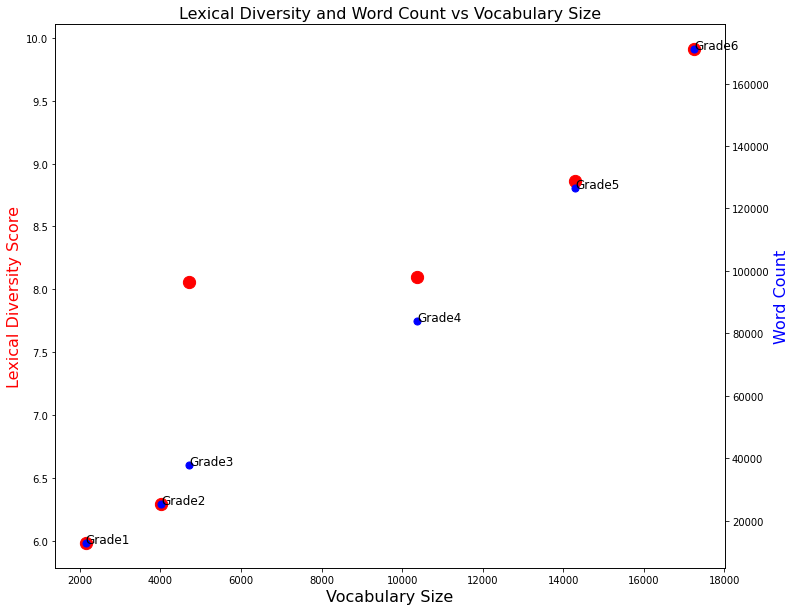

In [4]:
# There is probably a better way to write this.
# Using list comprehensions to return each part of the tuple into separate lists
# Remmber that book['score'] is a tuple of 3 values
lex_div_score = [book['score'][0] for book in books]
inv_lex_div_score = [1 / book['score'][0] for book in books]
vocab_size = [book['score'][1] for book in books]
word_count = [book['score'][2] for book in books]
labels = [book['name'] for book in books]

# Could probably use a better plotting package, e.g., Seaborn, but this will do
fig,ax = plt.subplots()
fig.set_size_inches(12, 10)
# Note, we will make the red dots bigger than the blue
ax.scatter(vocab_size, lex_div_score, s=150, color='red')

ax.set_xlabel('Vocabulary Size', fontsize=16)

ax.set_ylabel('Lexical Diversity Score', color='red', fontsize=16)

ax2 = ax.twinx()
ax2.scatter(vocab_size, word_count, s=50, color='blue')
ax2.set_ylabel('Word Count', color='blue', fontsize=16)

for i, label in enumerate(labels):
    ax2.annotate(label, (vocab_size[i], word_count[i]), fontsize=12)

plt.title('Lexical Diversity and Word Count vs Vocabulary Size', fontsize=16)
plt.show()

You will notice above that that for the most part things are linear in fashion, which intuitively makes sense to me. A measure of 'lexical diversity', however you define it, should increase with grade, right? The lexical diversity for Grade 3 is skewed. Remember, our initial definition for lexical diversity is proportional to Word Count. So, what this tells me is that the 3rd grade book didn't introduce many new vocabulary terms (in relation to going from Grade 1 to 2), but instead introduced more words overall. Perhaps it is to build the student's strength in reading stamina, before ramping up the difficulty in 4th grade!

Using vocabulary size or lexical diversity by themselves are not necessarily the best measures. Looking at both are needed I think, to take into account the vocabulary size along with number of words, as that would be more telling of how long the book is. Children need to learn new words along with learning to read and comprehend more in one reading session.

The plot below shows Vocab Size, Total Word Count, and Lexical Diversity against each Grade book. Once again, we notice the oddity with grade 3. We can see that vocab size didn't increase as strongly as before, while total word count did. The lexical diversity though in this case shot up, which is counter intuitive. What's surprising is that we can probably make a case for either definition of lexical diversity.

If we were to plot the inverse for lexical diversity (the definition in the second version of the book), then we would have a line with a negative slope, and that doesn't make sense to me either. We need a measure that takes into account total number of words and total number of unique words. Starting at grade 4, the slope for vocab size and total words is much larger than grades 1 through 3, which tells me lexical diversity should be higher with higher grades. 

Please note, our definition of vocab size here could be cleaned up as well. For example, we should consider removing case, checking if value is alpha numeric, removing stop words, consider stemming, etc. Perhaps that's an exercise for later.

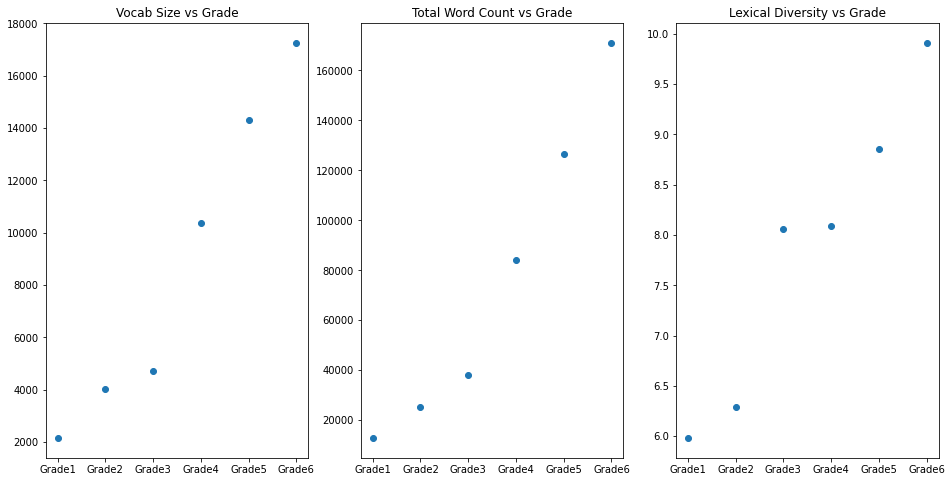

In [5]:
f = plt.figure(figsize=(16,8))
ax = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)

ax.scatter(x=labels, y=vocab_size)
ax2.scatter(x=labels, y=word_count)
ax3.scatter(x=labels, y=lex_div_score)

ax.set_title('Vocab Size vs Grade')
ax2.set_title('Total Word Count vs Grade')
ax3.set_title('Lexical Diversity vs Grade')

plt.show()

### Scratch Code - Ignore

In [6]:
#books[0]['tokens']

newList = []

for x in books[2]['tokens']:
    if x.isalpha():
        test = x.lower()
        newList.append(test)

In [7]:
newList

print(lexical_diversity(books[2]['tokens']))
print(lexical_diversity(newList))

(8.055579126007636, 4714, 37974)
(7.90743756786102, 3684, 29131)
